In [11]:
import xarray as xr

# Replace 'your_file.nc' with the actual path to your .nc file
file_path = 'data/geo_coordinates.nc'

# Open the NetCDF file
ds = xr.open_dataset(file_path)

# Display information about the dataset
print(ds)

<xarray.Dataset>
Dimensions:    (rows: 4090, columns: 4865)
Dimensions without coordinates: rows, columns
Data variables:
    altitude   (rows, columns) float32 ...
    latitude   (rows, columns) float64 ...
    longitude  (rows, columns) float64 ...
Attributes: (12/16)
    absolute_orbit_number:  28200
    ac_subsampling_factor:  64
    al_subsampling_factor:  1
    comment:                 
    contact:                ops@eumetsat.int
    creation_time:          2021-07-18T14:52:24Z
    ...                     ...
    references:             S3IPF PDS 004.1 - i2r4 - Product Data Format Spec...
    resolution:             [ 270 294 ]
    source:                 IPF-OL-1-EO 06.11
    start_time:             2021-07-17T10:10:14.573099Z
    stop_time:              2021-07-17T10:13:14.494075Z
    title:                  OLCI Level 1b Product, Geo Coordinates Data Set


In [12]:
ds.variables

Frozen({'altitude': <xarray.Variable (rows: 4090, columns: 4865)>
[19897850 values with dtype=float32]
Attributes:
    long_name:      DEM corrected altitude
    standard_name:  altitude
    units:          m
    valid_max:      9000
    valid_min:      -1000, 'latitude': <xarray.Variable (rows: 4090, columns: 4865)>
[19897850 values with dtype=float64]
Attributes:
    long_name:      DEM corrected latitude
    standard_name:  latitude
    units:          degrees_north
    valid_max:      90000000
    valid_min:      -90000000, 'longitude': <xarray.Variable (rows: 4090, columns: 4865)>
[19897850 values with dtype=float64]
Attributes:
    long_name:      DEM corrected longitude
    standard_name:  longitude
    units:          degrees_east
    valid_max:      180000000
    valid_min:      -180000000})

In [13]:
# Iterate through variables and print information
for variable_name, variable_data in ds.variables.items():
    print(f"Variable: {variable_name}")
    print("Attributes:")
    for attr_name, attr_value in variable_data.attrs.items():
        print(f"  {attr_name}: {attr_value}")
    print("\n")

Variable: altitude
Attributes:
  long_name: DEM corrected altitude
  standard_name: altitude
  units: m
  valid_max: 9000
  valid_min: -1000


Variable: latitude
Attributes:
  long_name: DEM corrected latitude
  standard_name: latitude
  units: degrees_north
  valid_max: 90000000
  valid_min: -90000000


Variable: longitude
Attributes:
  long_name: DEM corrected longitude
  standard_name: longitude
  units: degrees_east
  valid_max: 180000000
  valid_min: -180000000




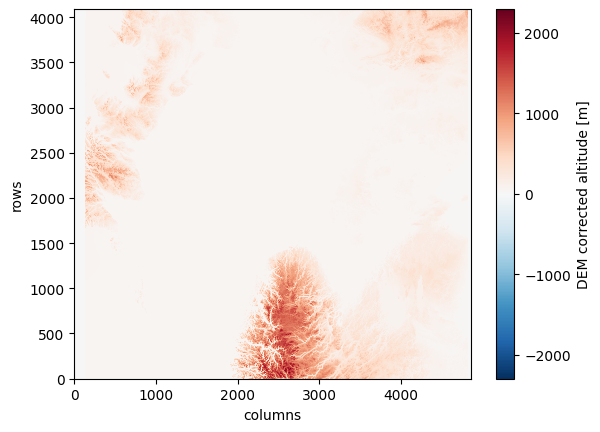

In [4]:
# Access variables in the dataset
variable_name = 'altitude'  # Replace with the actual variable name
variable_data = ds[variable_name]

# Perform data analysis or visualization here
# Example: Plotting a 2D variable
variable_data.plot()

# Close the dataset when you're done
ds.close()

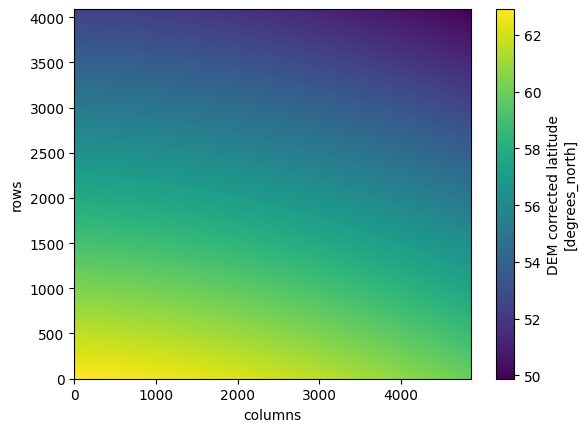

In [5]:
# Access variables in the dataset
variable_name = 'latitude'  # Replace with the actual variable name
variable_data = ds[variable_name]

# Perform data analysis or visualization here
# Example: Plotting a 2D variable
variable_data.plot()

# Close the dataset when you're done
ds.close()

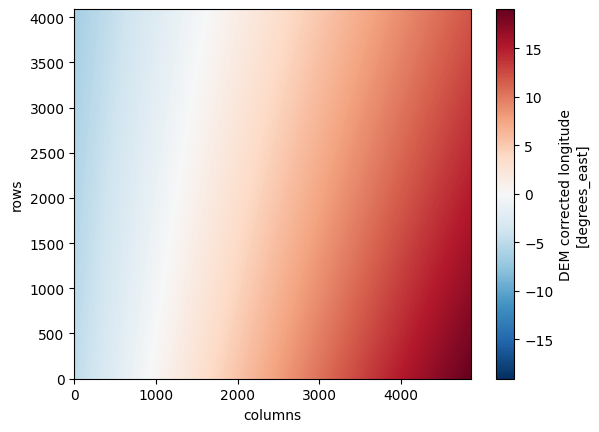

In [6]:
# Access variables in the dataset
variable_name = 'longitude'  # Replace with the actual variable name
variable_data = ds[variable_name]

# Perform data analysis or visualization here
# Example: Plotting a 2D variable
variable_data.plot()

# Close the dataset when you're done
ds.close()

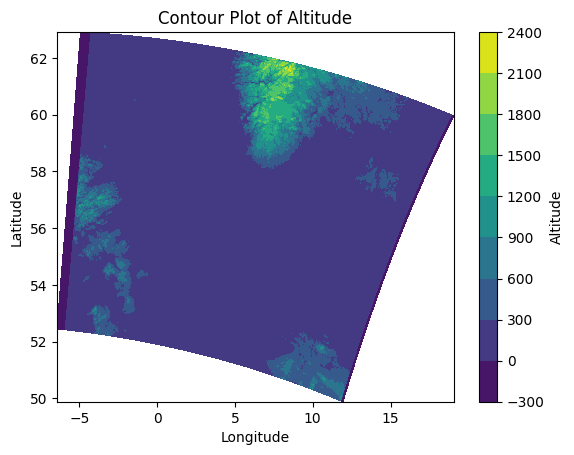

In [7]:
import matplotlib.pyplot as plt

plt.contourf(ds['longitude'], ds['latitude'], ds['altitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Contour Plot of Altitude')
plt.colorbar(label='Altitude')
plt.show()

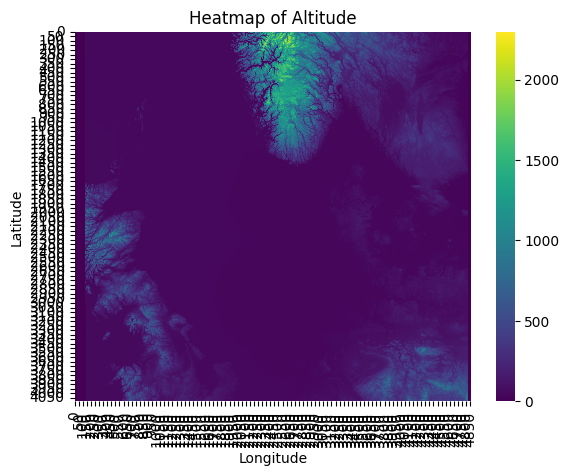

In [8]:
import seaborn as sns

sns.heatmap(ds['altitude'], cmap='viridis', xticklabels=50, yticklabels=50)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Altitude')
plt.show()


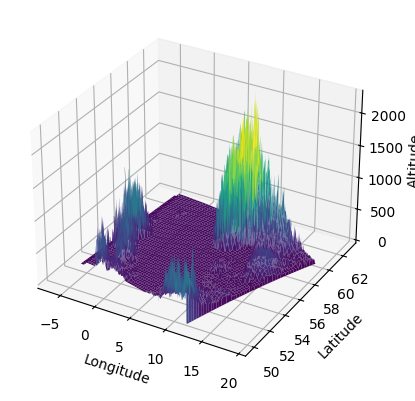

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(ds['longitude'], ds['latitude'], ds['altitude'], cmap='viridis')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Altitude')
plt.show()


In [12]:
import seaborn as sns
import pandas as pd

# Convert latitude and longitude to pandas DataFrame
df = pd.DataFrame({'latitude': ds['latitude'].values.flatten(),
                   'longitude': ds['longitude'].values.flatten(),
                   'altitude': ds['altitude'].values.flatten()})

# Create 2D Density Plot
sns.kdeplot(data=df, x='longitude', y='latitude', fill=True, cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2D Density Plot of Latitude and Longitude')
plt.show()


In [14]:
# Convert the xarray dataset to a pandas DataFrame
df = ds.to_dataframe()

# Close the dataset
ds.close()


In [15]:
df.describe()

,altitude,latitude,longitude
count,1.989785e+07,1.989785e+07,1.989785e+07
mean,1.430498e+02,5.660842e+01,5.029782e+00
std,2.197044e+02,3.101790e+00,6.205318e+00
min,-1.000000e+00,4.988545e+01,-6.443390e+00
25%,4.300000e+01,5.400735e+01,-2.646990e-01
50%,4.900000e+01,5.660498e+01,5.049917e+00
75%,1.270000e+02,5.919196e+01,1.017621e+01
max,2.296000e+03,6.290880e+01,1.906128e+01


In [9]:
import xarray as xr

# Replace 'your_file.nc' with the actual path to your .nc file
file_path1 = 'data/removed_pixels.nc'

# Open the NetCDF file
ds1 = xr.open_dataset(file_path1)

df1 = ds1.to_dataframe()

# Close the dataset
ds1.close()

In [12]:
df1

Oa01_radiance  Oa02_radiance  Oa03_radiance  \
rows removed_pixels                                                
0    0                  282.876038     321.669098     352.368378   
     1                  284.814606     323.703949     355.089569   
     2                  285.930328     325.069458     357.446289   
     3                  286.725250     326.702698     358.478882   
     4                  288.677765     327.840607     359.475037   
...                            ...            ...            ...   
4089 130                       NaN            NaN            NaN   
     131                       NaN            NaN            NaN   
     132                       NaN            NaN            NaN   
     133                       NaN            NaN            NaN   
     134                       NaN            NaN            NaN   

                     Oa04_radiance  Oa05_radiance  Oa06_radiance  \
rows removed_pixels                                                
0    0                  357.079865     348.700378     308.042023   
     1                  359.948303     351.739044     311.006927   
     2                  362.517242     353.798492     312.983521   
     3                  362.632416     354.686859     313.564148   
     4                  363.461853     355.030121     313.564148   
...                            ...            ...            ...   
4089 130                       NaN            NaN            NaN   
     131                       NaN            NaN            NaN   
     132                       NaN            NaN            NaN   
     133                       NaN            NaN            NaN   
     134                       NaN            NaN            NaN   

                     Oa07_radiance  Oa08_radiance  Oa09_radiance  \
rows removed_pixels                                                
0    0                  282.456848     277.240540     272.574707   
     1                  285.560272     280.273346     275.931854   
     2                  286.729553     281.894958     277.054077   
     3                  286.879028     281.482971     277.691254   
     4                  286.940552     281.369019     277.101624   
...                            ...            ...            ...   
4089 130                       NaN            NaN            NaN   
     131                       NaN            NaN            NaN   
     132                       NaN            NaN            NaN   
     133                       NaN            NaN            NaN   
     134                       NaN            NaN            NaN   

                     Oa10_radiance  ...  Oa19_radiance  Oa20_radiance  \
rows removed_pixels                 ...                                 
0    0                  269.653717  ...     143.034821      91.108414   
     1                  272.708557  ...     144.387482      90.941963   
     2                  273.876343  ...     145.101532      91.327087   
     3                  274.549194  ...     145.383118      91.842766   
     4                  273.613403  ...     145.865860      94.310181   
...                            ...  ...            ...            ...   
4089 130                       NaN  ...            NaN            NaN   
     131                       NaN  ...            NaN            NaN   
     132                       NaN  ...            NaN            NaN   
     133                       NaN  ...            NaN            NaN   
     134                       NaN  ...            NaN            NaN   

                     Oa21_radiance        SZA  altitude  detector_index  \
rows removed_pixels                                                       
0    0                  127.255211  44.856627      47.0           713.0   
     1                  128.091431  44.853933      47.0           714.0   
     2                  128.208115  44.851239      47.0           715.0   
     3                  127.488571  44.84

In [11]:
# Iterate through variables and print information
for variable_name, variable_data in ds1.variables.items():
    print(f"Variable: {variable_name}")
    print("Attributes:")
    for attr_name, attr_value in variable_data.attrs.items():
        print(f"  {attr_name}: {attr_value}")
    print("\n")

Variable: Oa01_radiance
Attributes:
  ancillary_variables: Oa01_radiance_err
  long_name: Radiance for removed pixels for OLCI acquisition band Oa01
  standard_name: toa_upwelling_spectral_radiance
  units: mW.m-2.sr-1.nm-1
  valid_max: 65534
  valid_min: 0


Variable: Oa02_radiance
Attributes:
  ancillary_variables: Oa02_radiance_err
  long_name: Radiance for removed pixels for OLCI acquisition band Oa02
  standard_name: toa_upwelling_spectral_radiance
  units: mW.m-2.sr-1.nm-1
  valid_max: 65534
  valid_min: 0


Variable: Oa03_radiance
Attributes:
  ancillary_variables: Oa03_radiance_err
  long_name: Radiance for removed pixels for OLCI acquisition band Oa03
  standard_name: toa_upwelling_spectral_radiance
  units: mW.m-2.sr-1.nm-1
  valid_max: 65534
  valid_min: 0


Variable: Oa04_radiance
Attributes:
  ancillary_variables: Oa04_radiance_err
  long_name: Radiance for removed pixels for OLCI acquisition band Oa04
  standard_name: toa_upwelling_spectral_radiance
  units: mW.m-2.sr-1.n